# Mapping key-value pairs with dictionaries

## THE SICHERMAN PUZZLE

A standard die has six sides, with faces numbered from 1 to 6. In many games, players
roll two standard dice and sum the obtained results. In the Sicherman puzzle, we are
asked to check if it is possible to number the faces of a pair of cubes in a way com-
pletely different from that of standard dice so that the cubes can be used in any dice
game and all the odds will be the same as they are when standard dice are used. More
formally, we want to check if there exist other pairs of two six-sided dice, not necessar-
ily identical, with faces numbered with positive integers that have the same probability
distribution for the sum of rolled values as standard dice.

In [1]:
two_standard_dist = Dict{Int, Int}()

Dict{Int64, Int64}()

In [2]:
for i in 1:6
    for j in 1:6
        s = i+j
        if haskey(two_standard_dist, s)
            two_standard_dist[s] +=1
        else
            two_standard_dist[s]=1
        end
    end
end

        

In [3]:
two_standard_dist

Dict{Int64, Int64} with 11 entries:
  5  => 4
  12 => 1
  8  => 5
  6  => 5
  11 => 2
  9  => 4
  3  => 2
  7  => 6
  4  => 3
  2  => 1
  10 => 3

In [4]:
values(two_standard_dist)

ValueIterator for a Dict{Int64, Int64} with 11 entries. Values:
  4
  1
  5
  5
  2
  4
  2
  6
  3
  1
  3

In [5]:
using Plots 

In [19]:
y = collect(values(two_standard_dist));
x = collect(keys(two_standard_dist));

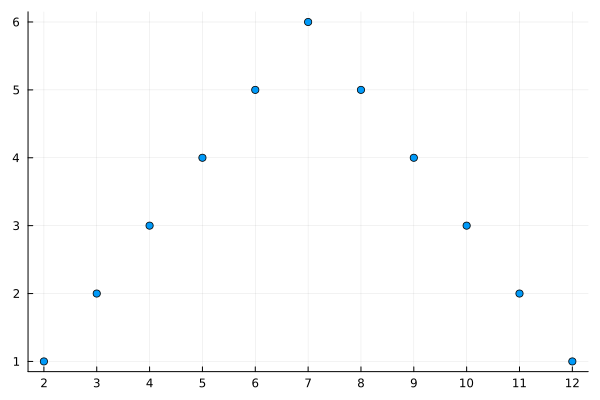

In [26]:
scatter(x, y, xaxis=1:12, legend=false)

In [71]:
all_possible_cases = [[1, x2, x3, x4, x5, x6] 
        for x2 in 2:11
            for x3 in x2:11 
                for x4 in x3:11 
                    for x5 in x4:11 
                        for x6 in x5: 11]

2002-element Vector{Vector{Int64}}:
 [1, 2, 2, 2, 2, 2]
 [1, 2, 2, 2, 2, 3]
 [1, 2, 2, 2, 2, 4]
 [1, 2, 2, 2, 2, 5]
 [1, 2, 2, 2, 2, 6]
 [1, 2, 2, 2, 2, 7]
 [1, 2, 2, 2, 2, 8]
 [1, 2, 2, 2, 2, 9]
 [1, 2, 2, 2, 2, 10]
 [1, 2, 2, 2, 2, 11]
 [1, 2, 2, 2, 3, 3]
 [1, 2, 2, 2, 3, 4]
 [1, 2, 2, 2, 3, 5]
 ⋮
 [1, 9, 9, 11, 11, 11]
 [1, 9, 10, 10, 10, 10]
 [1, 9, 10, 10, 10, 11]
 [1, 9, 10, 10, 11, 11]
 [1, 9, 10, 11, 11, 11]
 [1, 9, 11, 11, 11, 11]
 [1, 10, 10, 10, 10, 10]
 [1, 10, 10, 10, 10, 11]
 [1, 10, 10, 10, 11, 11]
 [1, 10, 10, 11, 11, 11]
 [1, 10, 11, 11, 11, 11]
 [1, 11, 11, 11, 11, 11]

In [72]:
answers = []
for d1 in all_possible_cases, d2 in all_possible_cases
    current_case_dist = Dict{Int, Int}()
    for i in d1, j in d2
            s = i+j
            if haskey(current_case_dist, s)
                current_case_dist[s] +=1
            else
                current_case_dist[s]=1
            end
        end
    if current_case_dist == two_standard_dist
            append!(answers,[d1, d2, current_case_dist])
    end
end

In [73]:
answers

9-element Vector{Any}:
 [1, 2, 2, 3, 3, 4]
 [1, 3, 4, 5, 6, 8]
 Dict(5 => 4, 12 => 1, 8 => 5, 6 => 5, 11 => 2, 9 => 4, 3 => 2, 7 => 6, 4 => 3, 2 => 1…)
 [1, 2, 3, 4, 5, 6]
 [1, 2, 3, 4, 5, 6]
 Dict(5 => 4, 12 => 1, 8 => 5, 6 => 5, 11 => 2, 9 => 4, 3 => 2, 7 => 6, 4 => 3, 2 => 1…)
 [1, 3, 4, 5, 6, 8]
 [1, 2, 2, 3, 3, 4]
 Dict(5 => 4, 12 => 1, 8 => 5, 6 => 5, 11 => 2, 9 => 4, 3 => 2, 7 => 6, 4 => 3, 2 => 1…)